# Credit risk analysis

Our first approach to credit risk analysis will require some data to be used. This data is related to a set of households and their finantial status based on different factors (borough, max debt acquired by the household for a period of time, etc.)

In [1]:
import pandas as pd

# Data loading from a CSV file
fulldata = pd.read_csv('../../data/nayaone_synthetic_data.csv')

# Transforming data to float
data = fulldata.astype(float)
data.head(10)

,Unnamed: 0,target,borough_county,primary_sector,company_type,annual_turnover,number_of_employees,turnover_bands,factoring_type,factoring_provider,...,turnover_wave12,turnover_wave13,turnover_wave14,turnover_vs_operating_cost_wave10,turnover_vs_operating_cost_wave11,turnover_vs_operating_cost_wave12,turnover_vs_operating_cost_wave13,turnover_vs_operating_cost_wave14,value_of_covid_based_loans_taken_out,train
0,858.0,0.0,2.9205,0.4856,-0.0330,0.0451,0.1019,0.2453,0.0226,0.0226,...,-8.000000,0.000000,0.0,15.000000,0.000000,-12.000000,0.00000,7.000000,0.00000,1.0
1,537.0,0.0,2.9205,0.0106,-0.0330,0.0451,-0.2906,-0.8283,-0.3079,1.7716,...,0.000000,0.000000,-9.0,0.000000,0.000000,15.000000,0.00000,-68.000000,26945.00000,1.0
2,302.0,0.0,-0.0118,0.4856,-0.0202,0.0451,0.1019,0.2453,0.0226,0.0226,...,-74.000000,0.000000,0.0,5.000000,-9.000000,-9.000000,0.00000,0.000000,0.00000,1.0
3,447.0,0.0,-0.0118,-0.6217,-0.0330,-0.3414,0.1019,0.2453,0.0226,0.0226,...,0.000000,30.000000,0.0,34.000000,0.000000,9.000000,0.00000,0.000000,32855.00000,1.0
4,867.0,0.0,2.9205,-0.6217,-0.0330,-0.3414,0.1019,-0.8283,0.0226,0.0226,...,11.000000,0.000000,-9.0,0.000000,0.000000,0.000000,0.00000,-7.000000,26217.00000,1.0
5,305.0,0.0,2.9205,0.0106,-0.0330,0.0451,0.1019,0.2453,0.0226,0.0226,...,-66.000000,0.000000,-10.0,0.000000,-80.000000,-10.000000,0.00000,6.000000,0.00000,1.0
6,172.0,1.0,-0.7430,0.0913,-0.0202,0.0451,0.1019,0.2453,0.0226,0.0226,...,-10.000000,-9.000000,-9.0,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,1.0
7,528.0,0.0,-0.0118,0.4856,-0.0330,0.0451,0.1019,0.2453,0.0226,0.0226,...,0.000000,0.000000,13.0,41.000000,-77.000000,-44.000000,0.00000,0.000000,0.00000,1.0
8,326.0,1.0,-0.7430,0.4856,-0.0330,0.0451,0.1019,0.2453,0.0226,0.0226,...,0.000000,0.000000,12.0,11.000000,0.000000,0.000000,0.00000,10.000000,0.00000,1.0
9,344.0,0.0,2.9205,-0.1203,-0.0330,0.0451,-0.2906,-0.8283,0.0226,0.0226,...,-5.879253,-5.821141,0.0,3.011241,-4.644068,-4.528014,-2.68406,-3.590444,13669.49174,1.0


Like in any other Supervised Machine Learning case we will need to split the data into different chunks. First, splitting the data that is considered a feature (and will be used to assess the risk analysis) and the data that is considerd Label. Also, we will split the data into 70% used for training and 30% to establish how good our algorithm works with previously not seen data.

In [2]:
# Get the data for training and testing
data_train = data.groupby([data.index,'train']).filter(lambda x: x['train'] == 1.).reset_index()
data_test = data.groupby([data.index,'train']).filter(lambda x: x['train'] == 0.).reset_index()
# Separate X and y considering dropping not useful columns
X_train = data_train.drop(['target', 'Unnamed: 0', 'train'] ,axis="columns")
y_train = data_train['target']
X_test = data_test.drop(['target', 'Unnamed: 0', 'train'] ,axis="columns")
y_test = data_test['target']

We should always check that our dataset is balanced enough to avoid any bias on the data itself.

In [3]:
# Review the balance of the target variable in train
y_train.value_counts(normalize=True)*100

0.0    70.422535
1.0    29.577465
Name: target, dtype: float64

In [4]:
# Review the balance of the target variable in test
y_test.value_counts(normalize=True)*100

0.0    70.545455
1.0    29.454545
Name: target, dtype: float64

## Preprocessing

It is common that due to resource limitation becomes difficult to encode all available data into a QML algorithm. But it is also true that real-case data often comes with quite some noise that could affect our model so it is a good choice to play with dimensionality reduction techniques in order to compress all the information in a minimal subset of features and thus, avoid always present noise.

In [5]:
# Hard split by half on the dataframe for the LDA dimensionality reduction

# Train split
features_a = X_train.iloc[:,:83]
features_b = X_train.iloc[:,83:]

# Test split
features_a_test = X_test.iloc[:,:83]
features_b_test = X_test.iloc[:,83:]

In [6]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# LDA fit with the separated groups
lda1 = LDA(n_components=1, solver='svd').fit(features_a, y_train)
lda2 = LDA(n_components=1, solver='svd').fit(features_b, y_train)

# LDA train transformation
features_lda_1 = lda1.transform(features_a)
features_lda_2 = lda2.transform(features_b)

# LDA test transformation (using train fit)
features_lda_1_test = lda1.transform(features_a_test)
features_lda_2_test = lda2.transform(features_b_test)

# Arrays to dataframe for join in a single dataframe
features_lda_1 = pd.DataFrame(features_lda_1)
features_lda_2 = pd.DataFrame(features_lda_2)
features_lda_1_test = pd.DataFrame(features_lda_1_test)
features_lda_2_test = pd.DataFrame(features_lda_2_test)

# Join of dataframes
x_train_lda = pd.concat([features_lda_1, features_lda_2], axis=1)
x_test_lda = pd.concat([features_lda_1_test, features_lda_2_test], axis=1)

Another factor that is common is the scale disparity. It is important that we make our models agnostic to the scale and able to focus on the information encoded into our features. It is also convenient when dealing with Neural Networks, as normalization always helps convergence.

In this case we will replicate the information to different dataframes, acommodated to the target techniques we would like to use.

In [39]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, normalize

## QSVC
minmax_scaler = MinMaxScaler().fit(x_train_lda)
X_train_qsvc = minmax_scaler.transform(x_train_lda)
X_test_qsvc = minmax_scaler.transform(x_test_lda)

## SVC
strd_scaler = StandardScaler().fit(x_train_lda)
X_train_svc = strd_scaler.transform(x_train_lda)
X_test_svc = strd_scaler.transform(x_test_lda)

## VQC
strd_scaler = StandardScaler().fit(x_train_lda)
X_train_vqc = strd_scaler.transform(x_train_lda)
X_test_vqc = strd_scaler.transform(x_test_lda)
y_train_vqc = pd.DataFrame(y_train)
y_test_vqc = pd.DataFrame(y_test)

## Quantum Neural Network
minmax_scaler = MinMaxScaler().fit(x_train_lda)
X_train_nn = minmax_scaler.transform(x_train_lda)
X_test_nn = minmax_scaler.transform(x_test_lda)
y_train_nn = y_train.to_numpy()
y_test_nn = y_test.to_numpy()

# Models

Following lines will present some of the most common models used in classical ML and their quantum counterpart. We will register some common parameters so that they can be used by all following techniques.

In [8]:
from qiskit.utils import algorithm_globals

# Features
features_dim = len(x_test_lda.columns)

# number of qubits is equal to the number of features 
num_qubits = features_dim

# regularization parameter
C = 1000

# regularization parameter
maxiter = 50

# Random seed
algorithm_globals.random_seed = 12345

# Batch
batch = 40

# Shots
shots = 1024

# Features
features_dim = num_qubits

# Parameters for quantum implementations
num_params = features_dim
num_features = features_dim
num_inputs = features_dim

## SVC and QSVC

Support Vector Classifiers arepretty well known techniques enabling the separability of data in high dimensional spaces for classiciation tasks.

In [9]:
from sklearn.svm import SVC 

# Instantiate the SVC
svc = SVC()

# Training
svc.fit(X_train_svc,y_train)

# Testing
svc_score = svc.score(X_test_svc, y_test)
print(f"SVC classification test score: {svc_score}")

SVC classification test score: 0.7927272727272727


In [10]:
from sklearn import metrics

# Classification report of SVC
expected_y_svc  = y_test
predicted_y_svc = svc.predict(X_test_svc) 

# Print classification report and confusion matrix
print("Classification report: \n", metrics.classification_report(expected_y_svc, predicted_y_svc))

Classification report: 
               precision    recall  f1-score   support

         0.0       0.85      0.85      0.85       194
         1.0       0.65      0.65      0.65        81

    accuracy                           0.79       275
   macro avg       0.75      0.75      0.75       275
weighted avg       0.79      0.79      0.79       275



The classical counterpart of SVC takes advantage of the quantum embedding to improve the separability between the samples. For this a Quantum circuit known as a FeatureMap is used to map out classical observations to a quantum state that afterwards gets measures. By using this measured states instead of the original data we aim to improve the separability between our samples.

In [11]:
from qiskit.providers.aer import AerSimulator
from qiskit.utils import QuantumInstance
from qiskit.circuit.library import ZZFeatureMap

# Defining backend and feature map to be used
backend = QuantumInstance(
     AerSimulator(method='statevector'),
    seed_simulator=algorithm_globals.random_seed,
    seed_transpiler=algorithm_globals.random_seed,
)

# ZZ feature map
feature_map = ZZFeatureMap(feature_dimension=num_qubits, reps=3)

We can see how this Feature Maps is composed by parameterized actions where our data will be introduced to create data-specific quantum states.

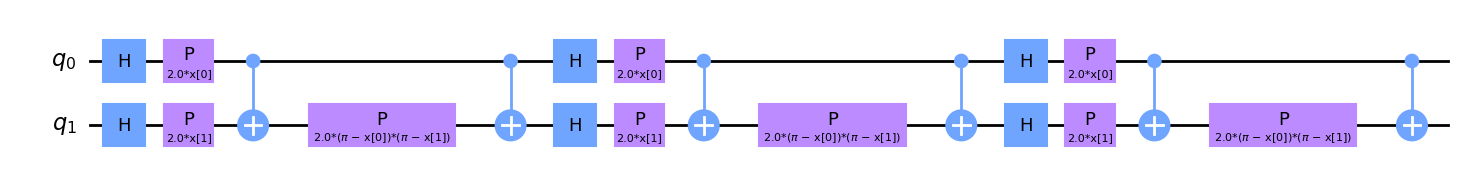

In [12]:
# Feature map circuit print
feature_map.decompose().draw(output = "mpl")

The our Quantum SVC will use this feature map to find the best way in which to split our newly encoded quantum data.

In [13]:
from qiskit_machine_learning.kernels import QuantumKernel
from qiskit_machine_learning.algorithms import QSVC

# Defining quantum kernel and qsvc
qkernel = QuantumKernel(feature_map=feature_map, quantum_instance=backend)
qsvc = QSVC(quantum_kernel=qkernel, C=C)

# Training
qsvc.fit(X_train_qsvc,y_train)

# Testing
qsvc_score = qsvc.score(X_test_qsvc, y_test)
print(f"QSVC classification test score: {qsvc_score}")

QSVC classification test score: 0.7927272727272727


In [14]:
# Classification report of QSVC
expected_y_qsvc  = y_test
predicted_y_qsvc = qsvc.predict(X_test_qsvc) 

# Print classification report and confusion matrix
print("Classification report: \n", metrics.classification_report(expected_y_qsvc, predicted_y_qsvc))

Classification report: 
               precision    recall  f1-score   support

         0.0       0.88      0.82      0.85       194
         1.0       0.63      0.73      0.67        81

    accuracy                           0.79       275
   macro avg       0.75      0.77      0.76       275
weighted avg       0.80      0.79      0.80       275



Well, there is some improvement over the previous example. At least some samples where better classified thanks to a simple encoding if you look at the classificatino report (class 1.0).

## Neural Networks

Neural networks are known to be very versatile models capable of approximation almost any relationship (between features and labels). We will fit a simple approach composed by three layers of 60, 40 and 20 ReLU units and a final sigmoid action on a single unit. Adam will be the optimization approach and binary crossentropy the cost function associated to our binary classification task.

Gradient based training algorithms like Adam will require gradient calculations but that is when frameworks such as TensorFlow and Keras will become handy (make sure you have them installed).

In [15]:
# General definitions
import warnings
warnings.filterwarnings('ignore')

In [21]:
# Keras
from keras.models import Sequential
from keras.layers import Dense

# Fit the model with specific layers and activations
model = Sequential()
model.add(Dense(60, input_dim=X_train_nn.shape[1], activation='relu', kernel_initializer='normal'))
model.add(Dense(40,activation='relu'))
model.add(Dense(20,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

# Model compiled
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train_nn, y_train, batch_size=batch, 
                 epochs=50, validation_data = (X_test_nn, y_test),verbose=1)

Epoch 1/50
16/16 [==============================] - 3s 41ms/step - loss: 0.6807 - accuracy: 0.6980 - val_loss: 0.6653 - val_accuracy: 0.7055
Epoch 2/50
16/16 [==============================] - 0s 15ms/step - loss: 0.6451 - accuracy: 0.7074 - val_loss: 0.6220 - val_accuracy: 0.7091
Epoch 3/50
16/16 [==============================] - 0s 16ms/step - loss: 0.5894 - accuracy: 0.7324 - val_loss: 0.5695 - val_accuracy: 0.7309
Epoch 4/50
16/16 [==============================] - 0s 14ms/step - loss: 0.5106 - accuracy: 0.8059 - val_loss: 0.5068 - val_accuracy: 0.8255
Epoch 5/50
16/16 [==============================] - 0s 11ms/step - loss: 0.3985 - accuracy: 0.9092 - val_loss: 0.4281 - val_accuracy: 0.8509
Epoch 6/50
16/16 [==============================] - 0s 12ms/step - loss: 0.2785 - accuracy: 0.9468 - val_loss: 0.3722 - val_accuracy: 0.8364
Epoch 7/50
16/16 [==============================] - 0s 12ms/step - loss: 0.1919 - accuracy: 0.9624 - val_loss: 0.3497 - val_accuracy: 0.8255
Epoch 8/50
16

In [22]:
# Testing
nn_score = model.evaluate(X_test_nn, y_test)
print("NN test accuracy score: %.2f%%" % (nn_score[1]*100))

9/9 [==============================] - 0s 6ms/step - loss: 0.4859 - accuracy: 0.8036
NN test aacuracy score: 80.36%


In [23]:
# Classification report of NN
expected_y_nn  = y_test
predicted_y_nn = (model.predict(X_test_nn) > 0.5).astype("int32")

# Print classification report and confusion matrix
print("Classification report: \n", metrics.classification_report(expected_y_nn, predicted_y_nn))

9/9 [==============================] - 0s 3ms/step
Classification report: 
               precision    recall  f1-score   support

         0.0       0.86      0.87      0.86       194
         1.0       0.67      0.65      0.66        81

    accuracy                           0.80       275
   macro avg       0.76      0.76      0.76       275
weighted avg       0.80      0.80      0.80       275



Not bad. Similar to our original SVC approach. Let's try now with Qiskit enabled Quantum Neural Networks. Two main pieces will compose our quantum NN:

* Feature map: where the classical data gets encoded as quantum states
* Ansatz or PQC: A parameterized set of gates that act as layers in our network

Given the measurements we can produce in Qiskit the simpler case is the binary classification, even though by stacking several binary classifiers a multi-label classifier can also be composed.

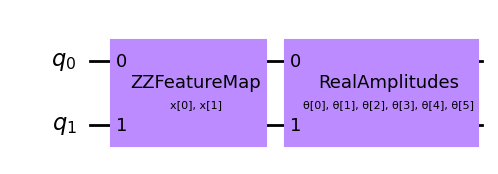

In [24]:
from qiskit import QuantumCircuit
from qiskit.circuit.library import ZZFeatureMap, RealAmplitudes

# Declare the feature map
feature_map = ZZFeatureMap(num_inputs)

# Declare the ansatz
ansatz = RealAmplitudes(num_inputs, reps=2) 

# Construct the quantum circuit
qc = QuantumCircuit(num_inputs)
qc.append(feature_map, range(num_inputs))
qc.append(ansatz, range(num_inputs))
qc.decompose().draw('mpl')

In [25]:
from qiskit.providers.aer import Aer
from qiskit_machine_learning.algorithms.classifiers import NeuralNetworkClassifier
from qiskit_machine_learning.neural_networks import CircuitQNN
from qiskit.algorithms.optimizers import L_BFGS_B

# Maps bitstrings to 0 or 1
def parity(x):
    return "{:b}".format(x).count("1") % 2

# Defining quantum instance
quantum_instance = QuantumInstance(Aer.get_backend("aer_simulator"), shots=shots)

# Declare the QNN circuit
circuit_qnn = CircuitQNN(
    circuit=qc,
    input_params=feature_map.parameters,
    weight_params=ansatz.parameters,
    interpret=parity,
    output_shape=2,
    quantum_instance=quantum_instance,
)

# Declare the classifier
circuit_classifier = NeuralNetworkClassifier(
            neural_network=circuit_qnn, optimizer= L_BFGS_B(maxiter=maxiter), loss='absolute_error'
)

In [26]:
circuit_classifier.fit(X_train_nn,y_train_nn)

In [27]:
y_pred = circuit_classifier.predict(X_test_nn)

# print classification report and confusion matrix for the classifier
print("Classification report: \n", metrics.classification_report(y_test_nn, y_pred))

Classification report: 
               precision    recall  f1-score   support

         0.0       0.90      0.67      0.77       194
         1.0       0.51      0.83      0.63        81

    accuracy                           0.72       275
   macro avg       0.71      0.75      0.70       275
weighted avg       0.79      0.72      0.73       275



Well we got to improve a little bit but lets try with some gradient training and a more generic approach. In this case, Pennylane will help us minimize the amount of implementation to be done for our Variational Quantum Classifier.

## Variational Quantum Classifier

We will check for a more generic approach thanks to Pennylane. As we already discussed in previous chapters, Pennylane allows for automatic differentiation similar to how tensorflow or pytorch work at classical level.

In [40]:
# PennyLane
import pennylane as qml
from pennylane import numpy as np # this is conflicting with regular numpy on first line
from pennylane.templates.embeddings import AngleEmbedding
from pennylane.optimize import AdamOptimizer

# Device
dev = qml.device('default.qubit', wires = num_qubits)

# Our generic candidate circuit
def circuit(parameters, X_train_vqc):
    for i in range(num_qubits):
        qml.Hadamard(wires = i)
    
    # Angle embedding for classical embedding
    AngleEmbedding(features = X_train_vqc, wires = range(num_qubits), rotation = 'Y')
    
    # This will be our PQC of choice
    qml.StronglyEntanglingLayers(weights = parameters, wires = range(num_qubits))
    
    # And measuring on 0 qubit we will get if it corresponds to one or other label
    return qml.expval(qml.PauliZ(0))

Now that the device and our candidate circuit are set we just need to amrry the two.

In [31]:
# QNode: Device + Circuit
vqc = qml.QNode(circuit, dev, diff_method="backprop")

In [41]:
# Parameters definition
num_layers = 5
weights_init = 0.01 * np.random.randn(num_layers, num_qubits, 3, requires_grad=True)
bias_init = np.array(0.0, requires_grad=True)

Our circuit can be used as it sits...

In [42]:
vqc(weights_init, X_train_vqc[0])

tensor(0.30397452, requires_grad=True)

But better if we train it like before.

In [43]:
# VQC functions
def variational_classifier(weights, bias, x):
    return vqc(weights, x) + bias

def square_loss(labels, predictions):
    loss = 0
    for l, p in zip(labels, predictions):
        loss = loss + (l - p) ** 2

    loss = loss / len(labels)
    return loss

def accuracy(labels, predictions):

    loss = 0
    for l, p in zip(labels, predictions):
        if abs(l - p) < 1e-5:
            loss = loss + 1
    loss = loss / len(labels)

    return loss

def cost(weights, bias, X, Y):
    predictions = [variational_classifier(weights, bias, x) for x in X]
    return square_loss(Y, predictions)

In [45]:
# Optimizer declaration and batch parameter
opt = AdamOptimizer(stepsize=0.1, beta1=0.9, beta2=0.99, eps=1e-08)
batch_size = batch

weights = weights_init
bias = bias_init

wbest = 0
bbest = 0
abest = 0

# X and y definition with shift label from [[0, 1] to [-1, 1]
Y = np.array(y_train_vqc.values[:,0] * 2 - np.ones(len(y_train_vqc.values[:,0])), requires_grad = False)
X = np.array(X_train_vqc, requires_grad=False)

for it in range(50):

    # Weights update by each optimizer step

    batch_index = np.random.randint(0, len(X), (batch_size,))
    X_batch = X[batch_index]
    Y_batch = Y[batch_index]
    weights, bias, _, _ = opt.step(cost, weights, bias, X_batch, Y_batch)

    # Accuracy computation
    predictions = [np.sign(variational_classifier(weights, bias, x)) for x in X]

    acc = accuracy(Y, predictions)
    
    if acc > abest:
        wbest = weights
        bbest = bias
        abest = acc
        print('New best')

    print(
        "Iter: {:5d} | Cost: {:0.7f} | Accuracy: {:0.7f} ".format(
            it + 1, cost(weights, bias, X, Y), acc
        )
    )

New best
Iter:     1 | Cost: 0.6364835 | Accuracy: 0.7981221 
New best
Iter:     2 | Cost: 0.3122628 | Accuracy: 0.9358372 
New best
Iter:     3 | Cost: 0.2477873 | Accuracy: 0.9405321 
Iter:     4 | Cost: 0.2545324 | Accuracy: 0.9389671 
Iter:     5 | Cost: 0.2693816 | Accuracy: 0.9389671 
New best
Iter:     6 | Cost: 0.2902558 | Accuracy: 0.9452269 
New best
Iter:     7 | Cost: 0.2817261 | Accuracy: 0.9530516 
New best
Iter:     8 | Cost: 0.2631272 | Accuracy: 0.9577465 
New best
Iter:     9 | Cost: 0.2392357 | Accuracy: 0.9624413 
Iter:    10 | Cost: 0.2215741 | Accuracy: 0.9624413 
Iter:    11 | Cost: 0.2097524 | Accuracy: 0.9593114 
Iter:    12 | Cost: 0.2076297 | Accuracy: 0.9593114 
New best
Iter:    13 | Cost: 0.1977010 | Accuracy: 0.9640063 
Iter:    14 | Cost: 0.1966792 | Accuracy: 0.9593114 
Iter:    15 | Cost: 0.1901099 | Accuracy: 0.9624413 
Iter:    16 | Cost: 0.1872909 | Accuracy: 0.9577465 
Iter:    17 | Cost: 0.1937690 | Accuracy: 0.9593114 
Iter:    18 | Cost: 0.19418

In [46]:
# X_test and y_test transformation to be analyzed
Yte = np.array(y_test_vqc.values[:,0] * 2 - np.ones(len(y_test_vqc.values[:,0])), requires_grad = False)
Xte = np.array(normalize(X_test_vqc), requires_grad=False)

# Testing
predictions = [np.sign(variational_classifier(wbest, bbest, x)) for x in Xte]
accuracy_vqc = accuracy(Yte, predictions)

print(f'VQC test accuracy score: {np.round(accuracy_vqc, 2) * 100}%')

VQC test accuracy score: 79.0%


In [47]:
# Classification report of VQC
expected_y_vqc  = Yte
predicted_y_vqc = predictions 

# Print classification report and confusion matrix
print("Classification report: \n", metrics.classification_report(expected_y_vqc, predicted_y_vqc))

Classification report: 
               precision    recall  f1-score   support

        -1.0       0.89      0.79      0.84       194
         1.0       0.61      0.77      0.68        81

    accuracy                           0.79       275
   macro avg       0.75      0.78      0.76       275
weighted avg       0.81      0.79      0.79       275

